# Homework 9  Dimensional Reduction

## 1. Introduction
There are many features in the dataset, for example, a crime dataset may contain various features like the crime time, location, coordinates, crime type and so on. And each feature might be a column in the dataset, and each column can be considgered a dimension of the data set. And some of the features are dependent, some of them are not. So we take the number of independent features as the dimensionality of the data. 

Not all the dimensions of the dataset characterize the nature of the data or the hidden relationship inside the data, they might be just redundant and noisy features. So we need to choose the best representative features to do the analysis and get rid of the others. More over, Reducing dimensions of the data set, can help easier storage and processing of the data set.

To choose the best dimensions for use, we need to find out the most outstanding features of the data, and PCA[1] methond is one way to do so.

## 2. Data setup
We'll use two data sets here to build a new data set and analyze it. 

The first one is the crime data in 2017 of Chicago city. And it can be downloaded from https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data. It contains various features about the crimes, like the location, coordinats, date of the crime.


The second dataset is  community area socioeconomic data from 2008 to 2012 of Chicago City. and it can be download from https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6/data


This data set contains various features of the each community, including the number and the name of the community, percent of housing crowded,percent households below poverty,percent aged 16+ unemployed,percent aged 25+ without high school diploma,percent aged under 18 or over 64,per capita income and hardship index. Except for the number and name of the community, there are 7 other features we are interseted in.


we'll use the two date sets to build a new dataset that contaions all the NARCOTICS crimes in each community. and do PCA to this new data set.

Part of the code I wrote here is adapted from Ref[2],and part of the code is written by myself. 

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

First let's look at the crime data set. We only care about NARCOTICS here.

In [20]:
crime=pd.read_csv('2017.csv',usecols =['Primary Type','Community Area'])
crime.dropna(axis=0,how='any',inplace=True)
NARCOTICS=crime[crime['Primary Type']=='NARCOTICS']
crime_count=crime['Community Area'].value_counts()
crime_count=crime_count.reset_index()  #to data frame
crime_count.columns=['Community Area Number','crime_number']  #rename
crime_count.head()

,Community Area Number,crime_number
0,25,15327
1,8,12266
2,32,10594
3,29,9019
4,28,9018


First Let's take a look at the community dataset.

In [21]:
CommunityInfo=pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
CommunityInfo=CommunityInfo[:-1]  #get rid of the last row
CommunityInfo.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


We'll merge these two data set to build a new dataset containing NARCOTICS crime numbers for each community. 

And we don't want Community Area Number after the merge, and We want to use Community area name as index.

In [22]:
CommunityInfo=CommunityInfo.merge(crime_count,on='Community Area Number')
CommunityInfo.set_index(["COMMUNITY AREA NAME"], inplace=True)
CommunityInfo=CommunityInfo.drop(columns=['Community Area Number'])
CommunityInfo.head()

,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,crime_number
COMMUNITY AREA NAME,,,,,,,,
Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,4131
West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,3582
Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,3548
Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,1991
North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,1417


## 3. PCA Dimensional reduction process 
We'll use sklearn library to do the PCA.When using this implementation of PCA we need to specify in advance the number of principal components we want to use. Then we can just call the fit() method with our data frame and check the results. 

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(CommunityInfo)
PCA(copy=True, n_components=2, whiten=False)
existing_2d = pca.transform(CommunityInfo)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = CommunityInfo.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
COMMUNITY AREA NAME,,
Rogers Park,-1600.714134,718.448767
West Ridge,-2517.816012,200.233822
Uptown,10220.738155,-265.739281
Lincoln Square,11903.978437,-1880.725123
North Center,31472.259565,-3118.562205


In [24]:
print(pca.explained_variance_ratio_) 

[0.96387965 0.03611873]


We see that the first PC already explains almost 96% of the variance,and the second one accounts for 3%, and these two charaters account for 99%.

## 4. Display in graph and plots 
Next We'll draw our plots of the low dimensionality version of our dataset.

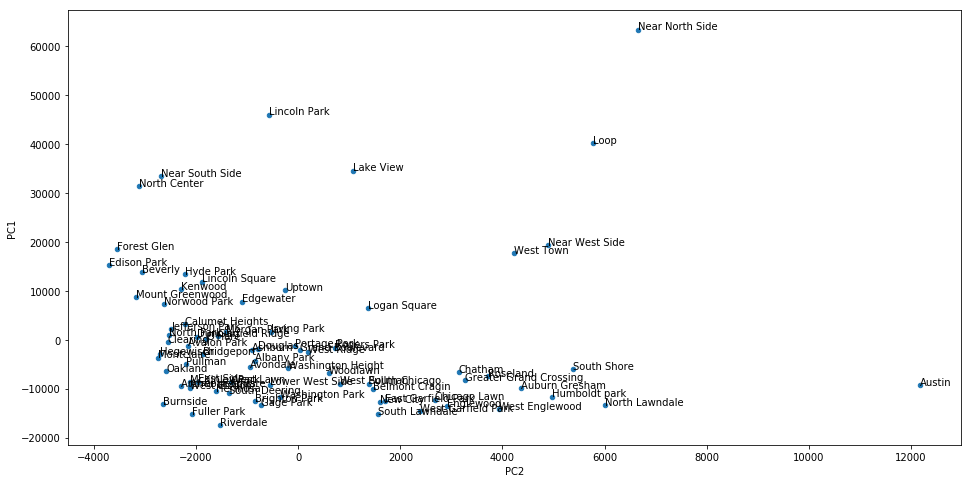

In [25]:
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, country in enumerate(CommunityInfo.index):
    ax.annotate(
        country, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )

Let's now create a bubble chart, by setting the point size to a value proportional to the income per capita of each community.

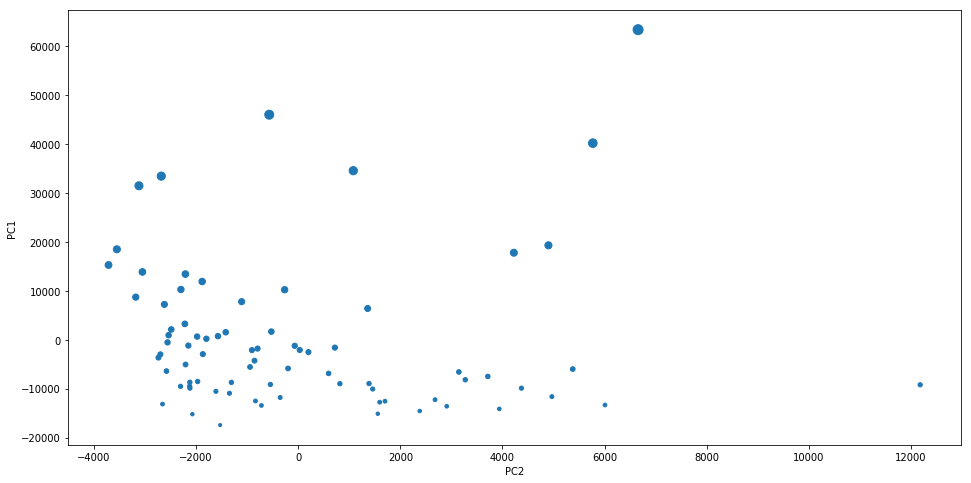

In [26]:
max_income=CommunityInfo['PER CAPITA INCOME '].max()
existing_df_2d['INCOME']=CommunityInfo['PER CAPITA INCOME ']/max_income
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['INCOME']*100, 
    figsize=(16,8))

by setting the point size to a value proportional to the NARCOTICS crime numbers in each community.

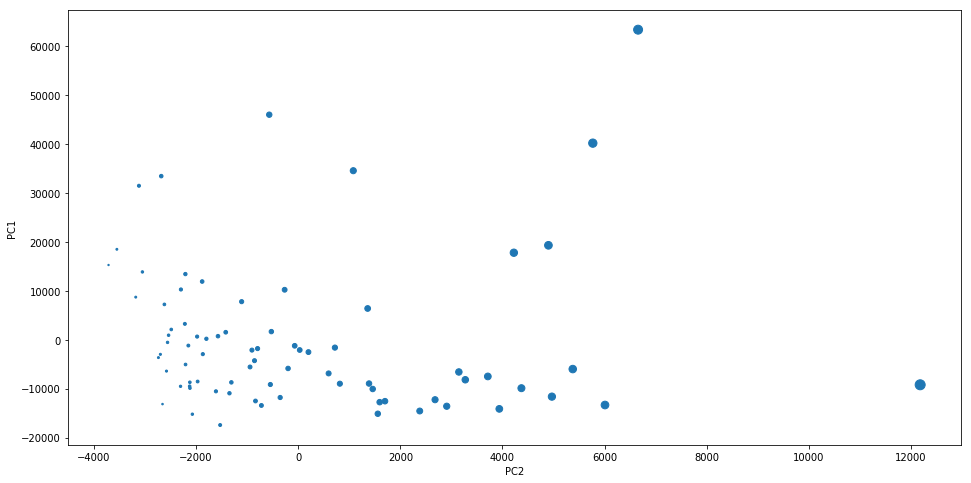

In [27]:
max_num=CommunityInfo['crime_number'].max()
existing_df_2d['CRIME']=CommunityInfo['crime_number']/max_num
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['CRIME']*100, 
    figsize=(16,8))

Let's now create a bubble chart, by setting the point size to a value proportional to the percent aged 16+ unemployed.

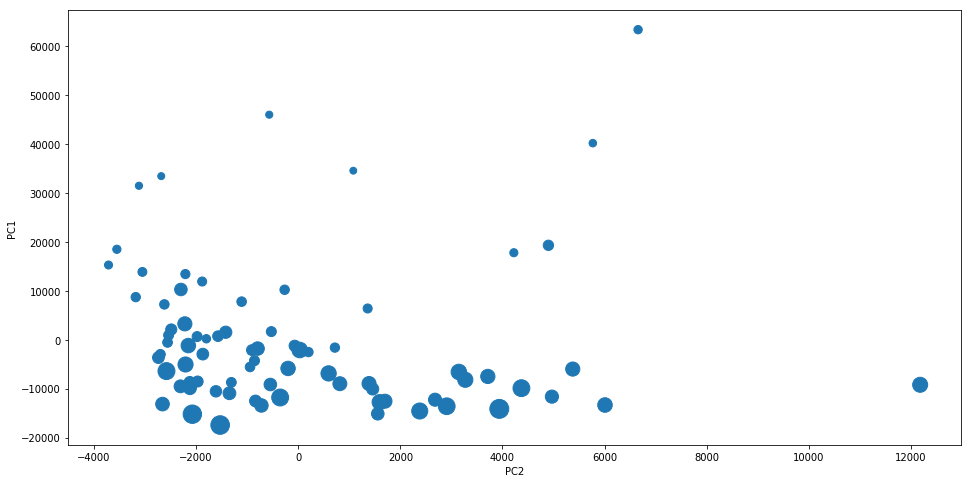

In [28]:
existing_df_2d['PERCENT AGED 16+ UNEMPLOYED']=CommunityInfo['PERCENT AGED 16+ UNEMPLOYED']
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['PERCENT AGED 16+ UNEMPLOYED']*10, 
    figsize=(16,8))

## 5. Discussion

Most of the communities are centrolized at the left down part of the plot. And incomes grows by PC1, crime numbers grows by PC2, And the percent aged 16+ unemployed decreases by PC1. So in general the richer communities contains less crimes excpet "Near North Side" whose income is high and crime numer is the second largest. And also we can see that, richer communities have less unemployed people, which might be one important reason of their lower NARCOTICS crime numbers.

## 6. Bibliography
[1] Pearson, K. (1901). "On Lines and Planes of Closest Fit to Systems of Points in Space" (PDF). Philosophical Magazine. 2 (11): 559–572. doi:10.1080/14786440109462720.

[2] https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka

# cluster analysis

In this section we will use k-means clustering to group communities

Text(0,0.5,'Average Within-Cluster distance to Centroid (WCSS)')

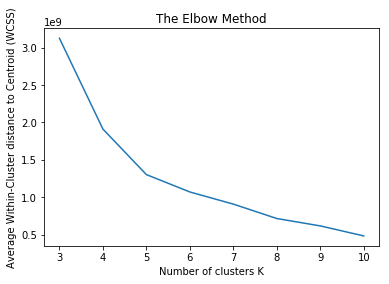

In [29]:
from sklearn.cluster import KMeans
import numpy as np
wcss=[]
for k in range(3,11):
    Res=KMeans(n_clusters=k,init='k-means++').fit(CommunityInfo)    
    wcss.append(Res.inertia_)   
fig = plt.figure()    
plt.plot(range(3,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')

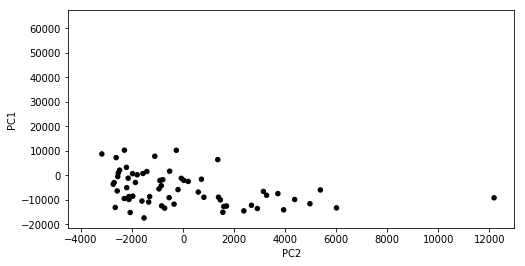

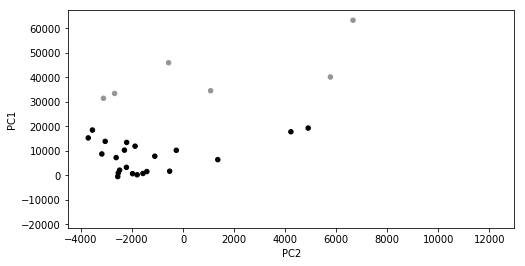

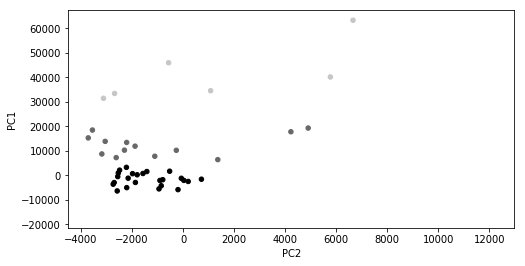

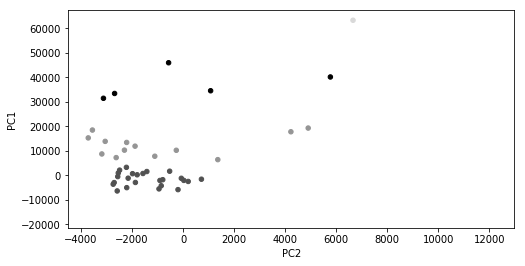

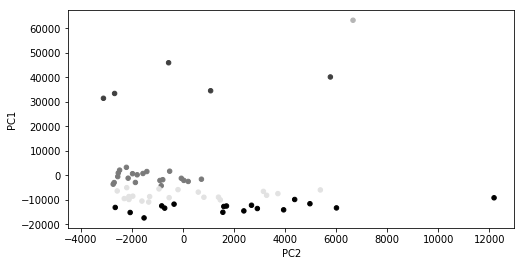

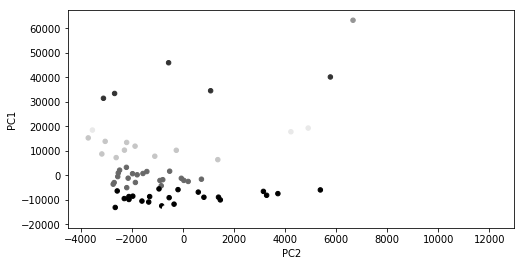

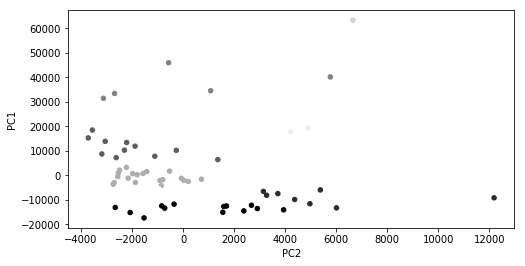

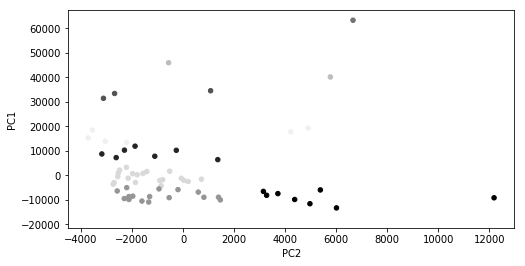

In [31]:
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit(CommunityInfo)
    existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)
    existing_df_2d.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=existing_df_2d.cluster.astype(np.float), 
    figsize=(8,4))

As we see that k=5 can group the data better in geographical coordinations

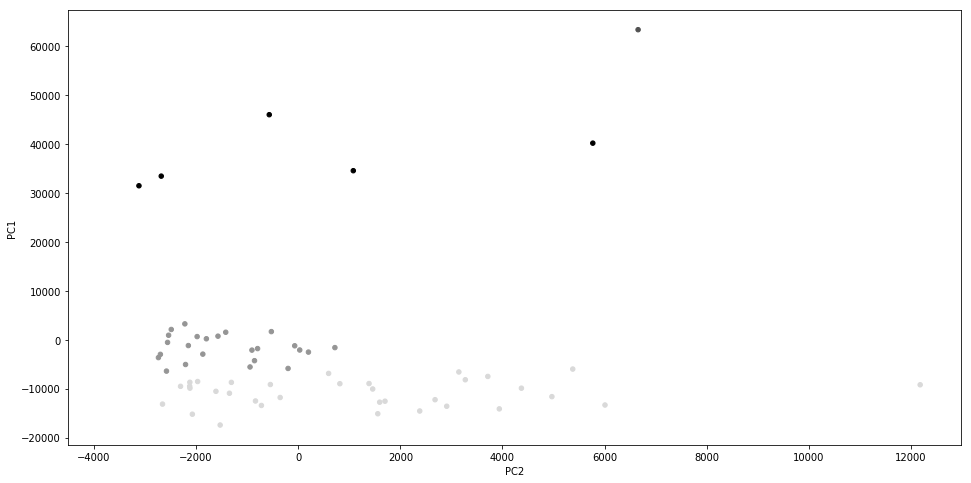

In [32]:
    kmeans = KMeans(n_clusters=5)
    clusters = kmeans.fit(CommunityInfo)
    existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)
    existing_df_2d.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=existing_df_2d.cluster.astype(np.float), 
    figsize=(16,8))